
# Descripción del proyecto

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El proposito de proyecto es explorar los datos de distintas fuentes para determinar, cual plan de prepago ofrece mejores regalías a la empresa, para asi poder enfocar mejor las campañas de marketing.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from scipy import stats as st
import math
from scipy.stats import levene

## Cargar los datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
try:
    data_int = pd.read_csv("megaline_internet.csv")
    data_plans = pd.read_csv("megaline_plans.csv")
    data_calls = pd.read_csv("megaline_calls.csv")
    data_msg = pd.read_csv("megaline_messages.csv")
    data = pd.read_csv("megaline_users.csv")
except:
    data_int = pd.read_csv("/datasets/megaline_internet.csv")
    data_plans = pd.read_csv("/datasets/megaline_plans.csv")
    data_calls = pd.read_csv("/datasets/megaline_calls.csv")
    data_msg = pd.read_csv("/datasets/megaline_messages.csv")
    data = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

In [3]:
data_int.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [4]:
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
data_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Planes

In [8]:
# Imprime la información general/resumen sobre el DataFrame de los planes
data_plans.info()
print()
print(f"Número de filas del conjunto de datos: ",data_plans.shape[0])
print(f"Número de columnas del conjunto de datos: ",data_plans.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

Número de filas del conjunto de datos:  2
Número de columnas del conjunto de datos:  8


In [9]:
# Imprime una muestra de los datos para los planes
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y busca en la información general y en la muestra impresa de los datos el precio de arriba de los datos. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo pueden corregirse?]

La columna `mb_per_mont_included` tiene los valores mal, se requiere corregir. 

## Corregir los datos

## Enriquecer los datos

## Usuarios

In [10]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
data.info()
print()
print(f"Número de filas del conjunto de datos: ",data.shape[0])
print(f"Número de columnas del conjunto de datos: ",data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Número de filas del conjunto de datos:  500
Número de columnas del conjunto de datos:  8


No se encuentran valores ausentes.


In [11]:
# Imprime una muestra de los datos para los usuarios
data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [12]:
data["user_id"].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

No se encuentran valores repetidos o mal escritos en la columna `user_id`.

In [13]:
sorted(data["city"].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

No se encuentra valores repetidos o mal escritos en la columna `city`, pe.

In [14]:
data.duplicated().sum()

0

No hay duplicados obvios en el dataset.

Los datos de las columnas `reg_date` y `churn_date` son de tipo object. Debido a que se presentan como fechas, habrá que cambiar el tipo de dato de objet a datetime. 

Se presentan datos ausentes en la columna `churn_date`, esto no nos afecta porque solo denota que los usuarios siguen registrados.

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
data["reg_date"] = pd.to_datetime(data["reg_date"], format= "%Y-%m-%d")
data["churn_date"] = pd.to_datetime(data["churn_date"], format= "%Y-%m-%d")

In [16]:
data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


### Enriquecer datos

In [17]:
data["reg_month"] = pd.DatetimeIndex(data["reg_date"]).month

In [18]:
data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


## Llamadas

In [19]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
data_calls.info()
print()
print(f"Número de filas del conjunto de datos: ",data_calls.shape[0])
print(f"Número de columnas del conjunto de datos: ",data_calls.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Número de filas del conjunto de datos:  137735
Número de columnas del conjunto de datos:  4


No se visualizan valores ausentes.

In [20]:
# Imprime una muestra de datos para llamadas
data_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [21]:
data_calls["user_id"].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1090,
       1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
       1102, 1103, 1104, 1105, 1106, 1107, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1122, 1123, 1124, 1125,
       1126, 1127, 1128, 1130, 1132, 1133, 1134, 1135, 1136, 1138, 1139,
       1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151,
       1152, 1153, 1154, 1155, 1156, 1157, 1158, 11

No se encuentran valores mal escritos en la columna `user_id`

In [22]:
data_calls["duration"].value_counts(normalize= True) #ver los valores de la columna duration

0.00     0.194823
8.37     0.000741
4.02     0.000741
3.91     0.000733
7.61     0.000726
           ...   
32.53    0.000007
24.74    0.000007
29.31    0.000007
29.30    0.000007
23.29    0.000007
Name: duration, Length: 2802, dtype: float64

Se puede apreciar que casi un 20% de los valores esta en 0. La empresa esto lo considera como una llamada perdida. Debido a que estas llamadas no se cobran, porque no fueron concretadas, se eliminarán del analisis debido a que no tienen un impacto directo en el resultado.

In [23]:
data_calls.duplicated().sum()

0

No se encuentran valores obvios duplicados.

Se puede visualizar en la columna `duration` de tipo float y minutos con decimlaes. Debido a que la empresa redondea los segundos a minutos, aunque haya pasado solo un segundo redondea al siguiente minuto, se rendondearan los minutos al siguiente entero. De igual manera, cambiaremos la columna a tipo int.

En la columna `call_date` se requiere cambiar el tipo de formato a datetime.

Se agregara una columna nueva llamada `month`, la cual guardará los valores del mes en el que se hicieron las llamadas.

### Corregir datos

In [24]:
data_calls["duration"] = np.ceil(data_calls["duration"]) #Se redondea hacia arriba la columna duration
data_calls["duration"] = data_calls["duration"].astype("int") #Se cambia la columna a tipo int.

In [25]:
data_calls = data_calls.query('duration != 0')

In [26]:
data_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


In [27]:
data_calls.query('duration == 0') # Se buscan valores en duration iguales a 0

,id,user_id,call_date,duration


Se comprueba que no hay valores iguales a 0 en la columna `duration`

In [28]:
data_calls["call_date"] = pd.to_datetime(data_calls["call_date"], format= "%Y-%m-%d")

In [29]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


Se comprueba el cambio del tipo de valores de la columna `call_date`.

### Enriquecer datos

In [30]:
data_calls["month"] = pd.DatetimeIndex(data_calls["call_date"]).month

In [31]:
data_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


Se observa que se agregó la columna nueva.

## Mensajes

In [32]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
data_msg.info()
print()
print(f"Número de filas del conjunto de datos: ",data_msg.shape[0])
print(f"Número de columnas del conjunto de datos: ",data_msg.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Número de filas del conjunto de datos:  76051
Número de columnas del conjunto de datos:  3


No se encuentra valores ausentes en el dataset.

In [33]:
# Imprime una muestra de datos para los mensajes
data_msg.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [34]:
data_msg["user_id"].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1011, 1013,
       1014, 1015, 1016, 1017, 1018, 1019, 1020, 1023, 1026, 1027, 1028,
       1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039,
       1043, 1044, 1045, 1046, 1047, 1051, 1052, 1053, 1054, 1055, 1056,
       1057, 1058, 1059, 1060, 1061, 1062, 1064, 1065, 1066, 1067, 1069,
       1070, 1072, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083,
       1084, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095,
       1096, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1107, 1110,
       1111, 1112, 1113, 1114, 1115, 1116, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1128, 1130, 1131, 1132, 1133, 1134,
       1136, 1137, 1138, 1139, 1140, 1141, 1142, 1144, 1145, 1146, 1147,
       1148, 1151, 1154, 1155, 1159, 1160, 1161, 1162, 1163, 1164, 1165,
       1167, 1168, 1169, 1170, 1172, 1173, 1174, 1175, 1176, 1177, 1178,
       1179, 1180, 1181, 1182, 1183, 1184, 1186, 11

No aparecen valores mal escritos o repetidos en la columna.

In [35]:
data_msg.duplicated().sum()

0

No hay valores obvios duplicados.

La columna `message_date` es de tipo object, como los valores representan fechas se cambiará a tipo datetime.
De igual manera, se creara una columna donde ira el valor del mes en el que fue enviado el mensaje.

### Corregir datos

In [36]:
data_msg["message_date"] = pd.to_datetime(data_msg["message_date"], format= "%Y-%m-%d")

In [37]:
data_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Se comprueba el cambio del tipo de valor en la columna `message_date`

### Enriquecer datos

In [38]:
data_msg["month"] = pd.DatetimeIndex(data_msg["message_date"]).month

In [39]:
data_msg.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


Se visualiza la nueva columna `month`

## Internet

In [40]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
data_int.info()
print()
print(f"Número de filas del conjunto de datos: ",data_int.shape[0])
print(f"Número de columnas del conjunto de datos: ",data_int.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Número de filas del conjunto de datos:  104825
Número de columnas del conjunto de datos:  4


No se encuentra valores ausentes en el dataset.

In [41]:
# Imprime una muestra de datos para el tráfico de internet
data_int.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [42]:
data_int["user_id"].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088,
       1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
       1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
       1122, 1123, 1124, 1125, 1126, 1127, 1128, 1130, 1131, 1132, 1133,
       1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

No se encuentran valores mal escritos.

La columna `session_date` el tipo de datos en object, pero tiene valores de fechas. Por consiguiente se corregira al tipo de data datetime.

Se agregará la columna `month`, la cual tendra el valor del mes en el que se consumieron los datos.

### Corregir datos

In [43]:
data_int["session_date"] = pd.to_datetime(data_int["session_date"], format= "%Y-%m-%d")

In [44]:
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Se comprueba que se haya cambia el tipo de datos en la columna `session_date`

### Enriquecer datos

In [45]:
data_int["month"] = pd.DatetimeIndex(data_int["session_date"]).month

In [46]:
data_int.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


Se comprueba que se agregó la columna `month`

## Estudiar las condiciones del plan

In [47]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario por periodo para poder tener solo un registro por usuario por periodo. Esto facilitará mucho su posterior análisis.]

In [48]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
c_per_usr = data_calls.pivot_table(index="user_id", columns="month", values="id", aggfunc="count")

In [49]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
cdur_per_usr = data_calls.pivot_table(index="user_id", columns="month", values="duration", aggfunc="sum")

In [50]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
msg_per_usr = data_msg.pivot_table(index="user_id", columns="month", values="id", aggfunc="count")

In [51]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
int_per_usr = data_int.pivot_table(index="user_id", columns="month", values="mb_used", aggfunc="sum")

[Pon los datos agregados juntos en un DataFrame para que un registro en él represente lo que un único usuario consumió en un mes determinado.]

In [52]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
merge_data = c_per_usr.merge(cdur_per_usr, on= "user_id", 
                how="outer")

In [53]:
merge_data = merge_data.merge(msg_per_usr, on= "user_id", 
                how="outer", sort=True)

In [54]:
merge_data = merge_data.merge(int_per_usr, on= "user_id", 
                how="outer", sort=True)

In [55]:
# Añade la información del plan
merge_data = merge_data.merge(data[["user_id","plan", "reg_month", "city"]], on="user_id", 
                        how="outer", sort=True)

In [56]:
merge_data.columns = ["user_id","1_calls","2_calls", "3_calls", "4_calls", #Se corrigen los nombres de las columnas
                   "5_calls","6_calls", "7_calls","8_calls",
                  "9_calls","10_calls","11_calls","12_calls",
                  "1_min","2_min", "3_min", "4_min",
                   "5_min","6_min", "7_min","8_min",
                  "9_min","10_min","11_min","12_min",
                  "1_msg","2_msg", "3_msg", "4_msg",
                   "5_msg","6_msg", "7_msg","8_msg",
                  "9_msg","10_msg","11_msg","12_msg",
                  "1_int","2_int", "3_int", "4_int",
                   "5_int","6_int", "7_int","8_int",
                  "9_int","10_int","11_int","12_int", "plan_name", "reg_month", "city"]

In [57]:
merge_data = merge_data.merge(data_plans, on="plan_name", how="left")

In [58]:
merge_data_0 = merge_data.fillna(0)

In [59]:
# Calcula el ingreso mensual para cada usuario
income_list=["income_1", "income_2", "income_3", "income_4",
           "income_5", "income_6", "income_7", "income_8",
           "income_9", "income_10", "income_11", "income_12"]
value = 1
for income in income_list:
        merge_data[income] = ((((merge_data_0[str(value) + "_min"] - merge_data_0["minutes_included"]) > 0) 
                          * (merge_data_0[str(value) + "_min"] - merge_data_0["minutes_included"])
                          * merge_data_0["usd_per_minute"] 
                          + ((merge_data_0[str(value) + "_msg"] - merge_data_0["messages_included"]) > 0) 
                          * (merge_data_0[str(value) + "_msg"] - merge_data_0["messages_included"])
                          * merge_data_0["usd_per_message"] 
                          + np.ceil(((merge_data_0[str(value) + "_int"] - merge_data_0["mb_per_month_included"]) > 0)/1024)
                          * np.ceil((merge_data_0[str(value) + "_int"] - merge_data_0["mb_per_month_included"])/1024)
                          * merge_data_0["usd_per_gb"]) + merge_data_0["usd_monthly_pay"])*(value >= merge_data_0["reg_month"])
        value += 1
        


In [60]:
def prueba_2(month, row):
    dur = row[str(month) + "_min"]
    lim_dur = row["minutes_included"]
    usd_dur = row["usd_per_minute"]
    
    msg = row[str(month) + "_msg"]
    lim_msg = row["messages_included"]
    usd_msg = row["usd_per_message"]
    
    inte = row[str(month) + "_int"]
    lim_int = row["mb_per_month_included"]
    usd_int = row["usd_per_gb"]
    
    base = row["usd_monthly_pay"]
    
    reg_month = row["reg_month"]

    
    if dur > lim_dur:
        dur = (dur - lim_dur)* usd_dur
    else:
         dur = 0
        
    if msg > lim_msg:
        msg = (msg - lim_msg) * usd_msg
    else:
        msg = 0
        
    if inte > lim_int:
            inte = (np.ceil((inte - lim_int)/1024)) * usd_int
    else:
        inte = 0
    
    return (dur + msg + inte + base) * (month >= reg_month)
    

In [61]:
#Probando la función creada
print(merge_data.loc[1, ["plan_name", "10_min", "10_msg", "10_int", "income_10"]])
print("Probando función:", prueba_2(10, merge_data.iloc[1]))
print()
print(merge_data.loc[3, ["plan_name", "12_min", "12_msg", "12_int", "income_12"]])
print("Probando función:",prueba_2(12, merge_data.iloc[3]))
print()
print(merge_data.loc[8, ["plan_name", "6_min", "6_msg", "6_int", "income_6"]])
print("Probando función:",prueba_2(6, merge_data.iloc[8]))

plan_name        surf
10_min          393.0
10_msg           53.0
10_int       22330.49
income_10       90.09
Name: 1, dtype: object
Probando función: 90.09

plan_name        surf
12_min         1104.0
12_msg           50.0
12_int       27044.14
income_12      158.12
Name: 3, dtype: object
Probando función: 158.12

plan_name    ultimate
6_min             NaN
6_msg             NaN
6_int             NaN
income_6          0.0
Name: 8, dtype: object
Probando función: 0


In [62]:
merge_data

,user_id,1_calls,2_calls,3_calls,4_calls,5_calls,6_calls,7_calls,8_calls,9_calls,...,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,38.0,...,0.0,0.0,0.0,0.0,0.0,20.0,20.0,90.09,60.0,60.00
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.00,60.0,20.00
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,158.12
4,1004,NaN,NaN,NaN,NaN,19.0,33.0,45.0,42.0,32.0,...,0.0,0.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,143.30,120.0,110.00
496,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,45.0,...,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,20.0,40.00
497,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
498,1498,NaN,28.0,29.0,42.0,29.0,29.0,40.0,37.0,39.0,...,70.0,70.0,90.0,20.0,120.0,70.0,100.0,80.00,60.0,100.00


In [63]:
merge_data = merge_data.replace(0, float("NAN"))

Se reemplazan los valores en 0 como valores NAN, porque estos indican que el cliente aun no se ha suscrito al plan. Por consiguiente si conservamos los 0, se interpretará que no tuvieron consumo pero si estaban activos.

In [64]:
merge_data

,user_id,1_calls,2_calls,3_calls,4_calls,5_calls,6_calls,7_calls,8_calls,9_calls,...,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,38.0,...,NaN,NaN,NaN,NaN,NaN,20.0,20.0,90.09,60.0,60.00
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,60.0,20.00
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,158.12
4,1004,NaN,NaN,NaN,NaN,19.0,33.0,45.0,42.0,32.0,...,NaN,NaN,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,143.30,120.0,110.00
496,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,45.0,...,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,20.0,40.00
497,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00
498,1498,NaN,28.0,29.0,42.0,29.0,29.0,40.0,37.0,39.0,...,70.0,70.0,90.0,20.0,120.0,70.0,100.0,80.00,60.0,100.00


Se imprime el dataset con las nuevas columnas de gasto por usuario por mes, creado apartir del consumo de minuto de llamadas, mensajes e internet de acuerdo al plan que contrataron.

## Estudia el comportamiento del usuario

A partir del dataset, creado en la anterior sección, se realizarán gráficos para por plan para decidir que plan es mas rentable. Se utilizaran los parámetros de la duración de las llamadas, mensajes enviado y consumo de internet.

### Llamadas

In [65]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
surf_min = merge_data.query('plan_name == "surf"')[["1_min", "2_min", "3_min", 
                                                          "4_min", "5_min", "6_min", 
                                                           "7_min", "8_min", "9_min", 
                                                           "10_min", "11_min", "12_min"]]
ultimate_min = merge_data.query('plan_name == "ultimate"')[["1_min", "2_min", "3_min", 
                                                                   "4_min", "5_min", "6_min", 
                                                                   "7_min", "8_min", "9_min",
                                                                   "10_min", "11_min", "12_min"]]
data_min = merge_data[["1_min", "2_min", "3_min", 
                       "4_min", "5_min", "6_min", 
                       "7_min", "8_min", "9_min",
                       "10_min", "11_min", "12_min", "plan_name"]]

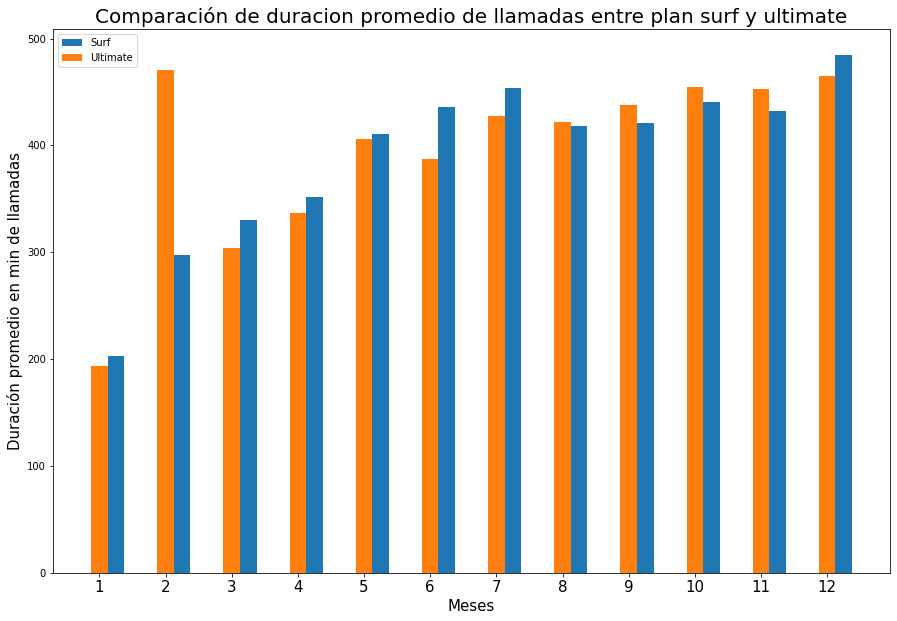

In [66]:
n = len(surf_min.mean().index)
x = np.arange(n) 
width = 0.25
plt.figure(figsize=(15, 10))
plt.bar(x+width, surf_min.mean(), width=0.25, label="Surf")
plt.bar(x, ultimate_min.mean(), width=0.25, label="Ultimate")
plt.title("Comparación de duracion promedio de llamadas entre plan surf y ultimate", fontsize=20)
plt.legend(loc='best')
plt.xticks(x, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Duración promedio en min de llamadas', fontsize=15)
plt.show()

Se puede apreciar en el gráfico que la duración promedio de las llamadas es similar en ambos planes, excepto en el 2do mes del año. Esto pudiera deberse a valores atipicos en los datos.

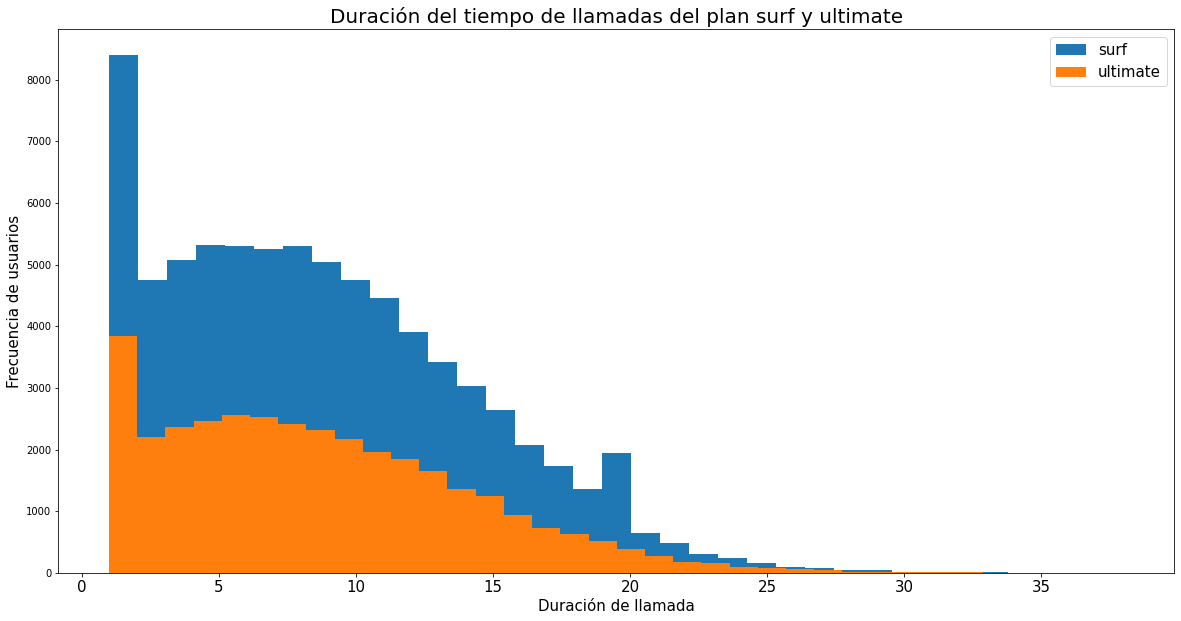

In [67]:
data_calls.merge(data, on="user_id", how="outer").query('plan == "surf"')["duration"].plot(kind="hist", bins=35, figsize=(20,10), label="surf")
data_calls.merge(data, on="user_id", how="outer").query('plan == "ultimate"')["duration"].plot(kind="hist", bins=35, figsize=(20,10), label="ultimate")
plt.title("Duración del tiempo de llamadas del plan surf y ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Duración de llamada', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.show()

Los usuarios del plan surf hace mas llamadas y más largas que los del plan ultimate.

In [68]:
ultimate_min.describe()

,1_min,2_min,3_min,4_min,5_min,6_min,7_min,8_min,9_min,10_min,11_min,12_min
count,4.000000,6.000000,12.000000,21.000000,29.000000,45.000000,59.000000,71.000000,86.000000,105.000000,125.000000,149.000000
mean,193.500000,470.333333,304.250000,336.857143,406.241379,387.444444,427.067797,421.436620,437.511628,455.028571,452.320000,465.261745
std,128.733575,233.120284,248.967732,186.785783,209.382537,194.685826,269.375898,231.614997,238.894254,229.807673,241.500738,245.890065
min,16.000000,90.000000,23.000000,53.000000,22.000000,45.000000,16.000000,12.000000,18.000000,34.000000,10.000000,11.000000
25%,139.750000,398.000000,81.000000,217.000000,262.000000,242.000000,202.000000,252.000000,249.500000,301.000000,295.000000,289.000000
50%,234.000000,473.500000,251.000000,301.000000,407.000000,400.000000,430.000000,406.000000,434.000000,461.000000,433.000000,445.000000
75%,287.750000,595.500000,477.500000,453.000000,480.000000,497.000000,554.500000,544.500000,557.500000,566.000000,587.000000,596.000000
max,290.000000,776.000000,711.000000,746.000000,863.000000,797.000000,1188.000000,1292.000000,1232.000000,1215.000000,1197.000000,1369.000000


In [69]:
surf_min.describe()

,1_min,2_min,3_min,4_min,5_min,6_min,7_min,8_min,9_min,10_min,11_min,12_min
count,2.000000,9.000000,23.000000,50.000000,75.000000,96.000000,120.000000,159.000000,191.000000,231.000000,277.000000,311.000000
mean,203.000000,297.000000,330.000000,351.540000,410.240000,435.791667,453.733333,417.849057,420.732984,440.891775,432.494585,484.501608
std,125.865007,228.531179,189.233622,225.536567,238.618481,209.985860,244.544500,228.304072,211.139557,220.680551,220.791275,244.708752
min,114.000000,39.000000,35.000000,16.000000,16.000000,14.000000,18.000000,4.000000,2.000000,6.000000,6.000000,17.000000
25%,158.500000,244.000000,230.500000,178.000000,216.500000,299.250000,307.250000,264.500000,267.000000,281.500000,279.000000,327.000000
50%,203.000000,254.000000,334.000000,339.500000,429.000000,432.000000,458.500000,395.000000,429.000000,437.000000,419.000000,453.000000
75%,247.500000,307.000000,397.000000,504.250000,562.500000,559.500000,587.250000,563.000000,552.500000,582.000000,583.000000,614.500000
max,292.000000,811.000000,788.000000,1043.000000,1055.000000,1033.000000,1176.000000,1102.000000,1212.000000,1227.000000,1304.000000,1510.000000


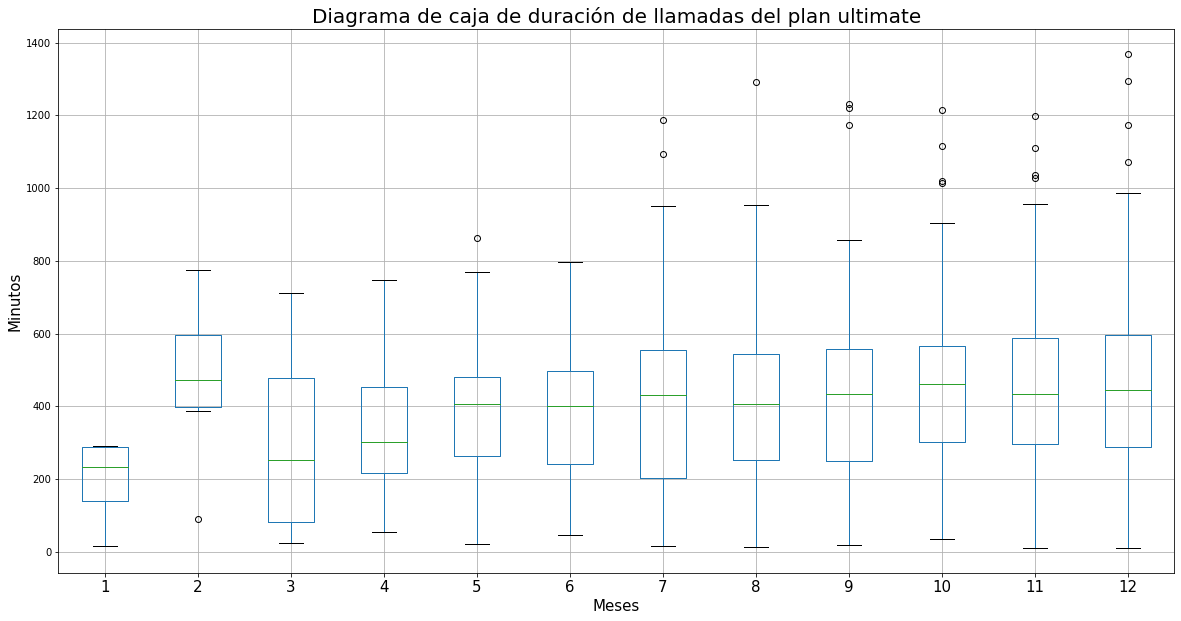

In [70]:
ultimate_min.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja de duración de llamadas del plan ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Minutos', fontsize=15)
plt.show()

En el diagrama de cajas para los disitintos meses del plan ultimate, se pueden apreciar valores atipicos en los meses 2, 5, 7, 8, 9, 10, 11 y 12.
De igual manera, aprecia que todos los valores están dentro del rango de menos de 3,000 minutos al mes, que es lo que ofrece el plan.

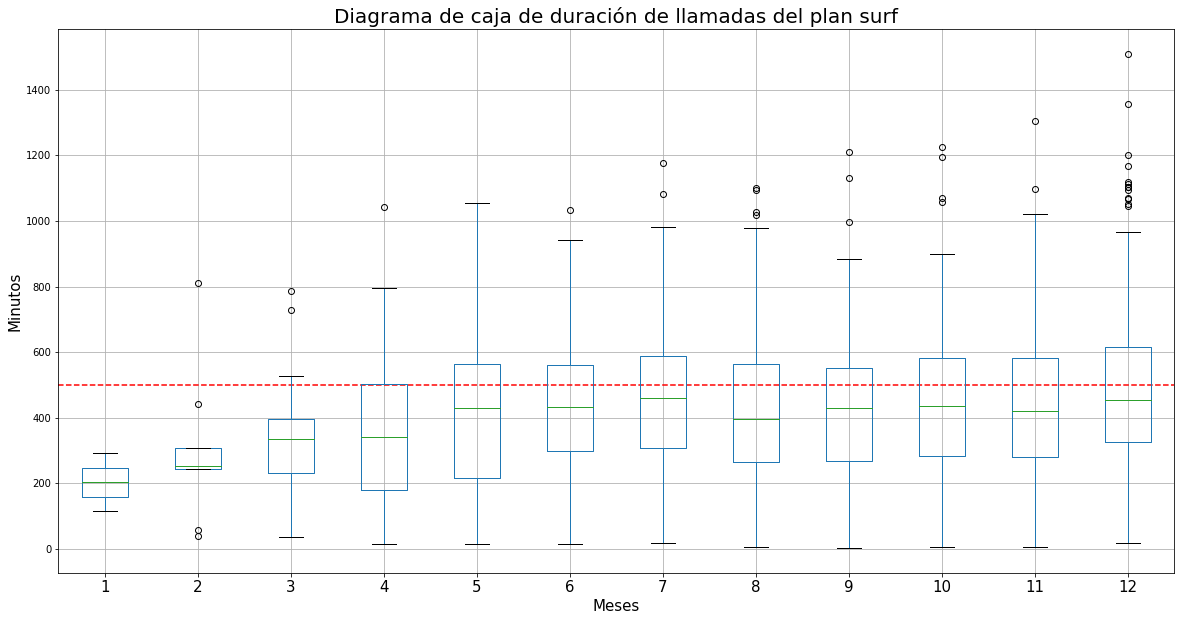

In [71]:
surf_min.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja de duración de llamadas del plan surf", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Minutos', fontsize=15)
reference = [500]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

En el diagrama de cajas para los disitintos meses del plan surf, se pueden apreciar valores atipicos en los meses 2, 3, 4, 6, 7, 8, 9, 10, 11 y 12.
De igual manera, se aprecia que hay muchos valores fuera del rango de menos de 500 minutos al mes, que es lo que ofrece el plan, incluso valores que no son atípicos.

Se puede distinguir que las medias y las medianas en los ambos casos son muy parecidas, este nos puede indicar que no hay tanta variación en los datos y pocos valores atípicos. Los promedios son muy parecidos en ambos planes. Por consiguiente, no se encuentran comportamientos disitntos en la duración de las llamadas de los planes.

### Mensajes

In [72]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_msg = merge_data.query('plan_name == "surf"')[["1_msg", "2_msg", "3_msg", 
                                                          "4_msg", "5_msg", "6_msg", 
                                                           "7_msg", "8_msg", "9_msg", 
                                                           "10_msg", "11_msg", "12_msg"]]
ultimate_msg = merge_data.query('plan_name == "ultimate"')[["1_msg", "2_msg", "3_msg", 
                                                          "4_msg", "5_msg", "6_msg", 
                                                           "7_msg", "8_msg", "9_msg", 
                                                           "10_msg", "11_msg", "12_msg"]]

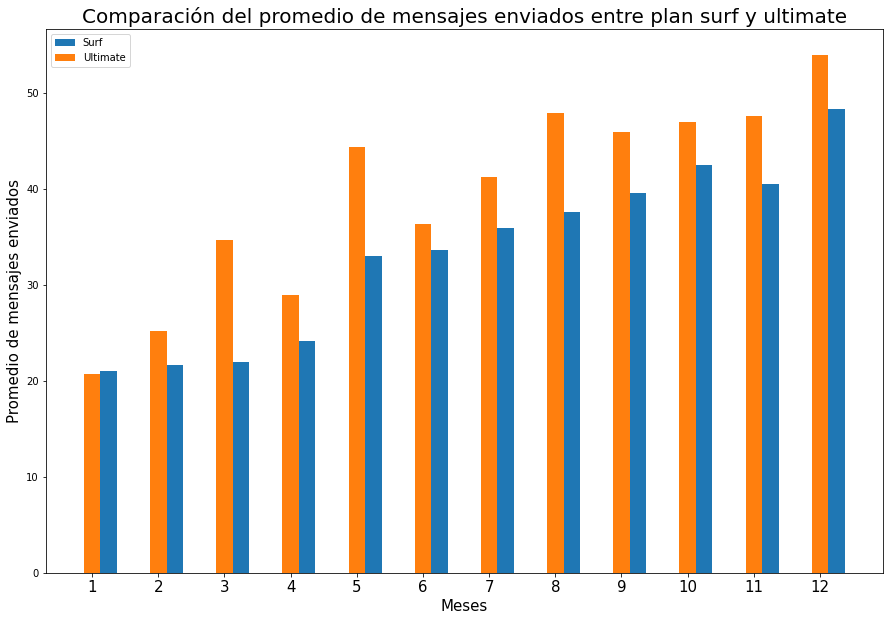

In [73]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
n = len(surf_msg.mean().index)
x = np.arange(n) 
width = 0.25
plt.figure(figsize=(15, 10))
plt.bar(x+width, surf_msg.mean(), width=0.25, label="Surf")
plt.bar(x, ultimate_msg.mean(), width=0.25, label="Ultimate")
plt.title("Comparación del promedio de mensajes enviados entre plan surf y ultimate", fontsize=20)
plt.legend(loc='best')
plt.xticks(x, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Promedio de mensajes enviados', fontsize=15)
plt.show()

Se puede apreciar que los usuarios del plan ultimate envían en promedio por mes más mensajes, que los usuarios del plan surf. Aun no podemos determinar si exista algun compartamiento distintos hasta concluir la investigación.

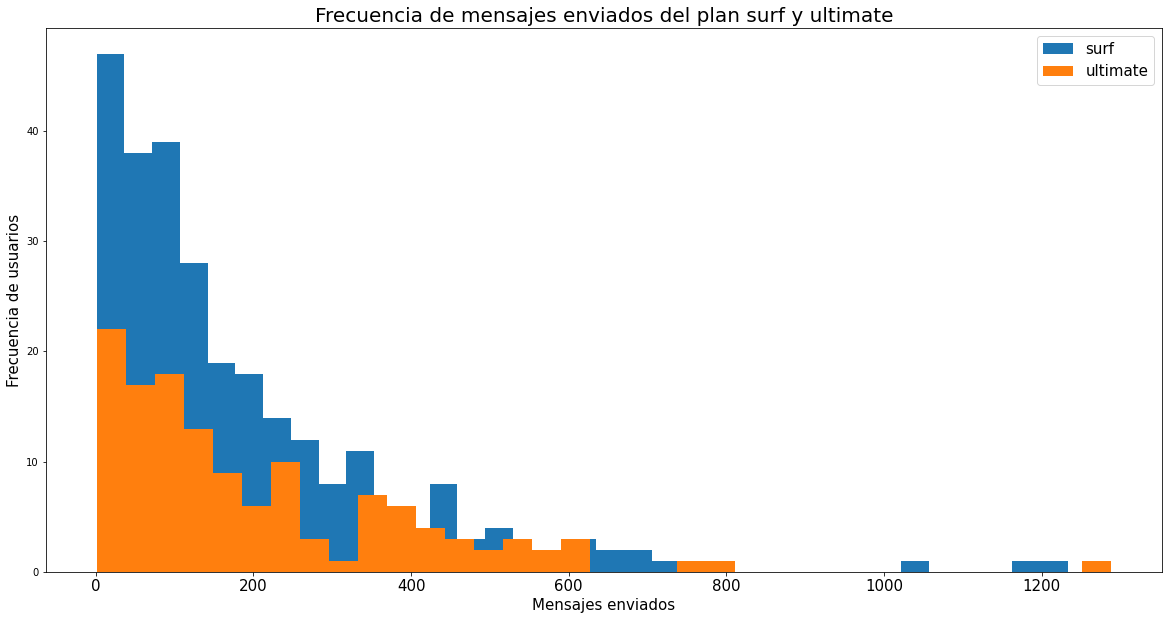

In [74]:
data_msg.groupby("user_id").count().merge(data, on="user_id", how="outer").query('plan == "surf"')["message_date"].plot(kind="hist", bins=35, figsize=(20,10), label="surf")
data_msg.groupby("user_id").count().merge(data, on="user_id", how="outer").query('plan == "ultimate"')["message_date"].plot(kind="hist", bins=35, figsize=(20,10), label="ultimate")
plt.title("Frecuencia de mensajes enviados del plan surf y ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Mensajes enviados', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.show()

Parece que los usuarios del plan surf tienen mayor consumo de mensajes que los del plan ultimate.

In [75]:
ultimate_msg.describe()

,1_msg,2_msg,3_msg,4_msg,5_msg,6_msg,7_msg,8_msg,9_msg,10_msg,11_msg,12_msg
count,3.000000,6.000000,7.000000,16.000000,21.000000,38.000000,47.000000,57.000000,71.000000,89.000000,103.000000,126.000000
mean,20.666667,25.166667,34.714286,28.937500,44.333333,36.289474,41.212766,47.929825,45.901408,46.977528,47.601942,53.936508
std,17.616280,21.572359,24.777102,22.646468,35.311943,28.411939,29.293074,32.161901,30.056212,33.151847,33.019703,37.064861
min,2.000000,8.000000,9.000000,5.000000,5.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,12.500000,12.750000,18.000000,12.500000,15.000000,15.250000,21.500000,20.000000,25.500000,23.000000,21.500000,24.250000
50%,23.000000,19.000000,26.000000,20.500000,35.000000,31.000000,35.000000,42.000000,47.000000,40.000000,41.000000,48.500000
75%,30.000000,25.250000,50.000000,34.750000,64.000000,57.000000,56.500000,71.000000,63.000000,65.000000,66.500000,77.000000
max,37.000000,67.000000,72.000000,77.000000,149.000000,143.000000,149.000000,151.000000,155.000000,153.000000,166.000000,150.000000


In [76]:
surf_msg.describe()

,1_msg,2_msg,3_msg,4_msg,5_msg,6_msg,7_msg,8_msg,9_msg,10_msg,11_msg,12_msg
count,1.0,5.000000,16.000000,36.000000,56.000000,73.000000,91.000000,124.000000,151.000000,189.000000,226.000000,254.000000
mean,21.0,21.600000,21.937500,24.166667,33.017857,33.616438,35.945055,37.596774,39.523179,42.433862,40.553097,48.326772
std,NaN,22.645088,18.763329,23.109058,29.460909,30.600758,30.132803,31.832621,30.709137,35.135333,31.662657,36.812090
min,21.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,21.0,7.000000,6.250000,6.750000,13.500000,10.000000,13.500000,14.750000,17.500000,17.000000,18.000000,24.000000
50%,21.0,11.000000,18.500000,18.500000,26.000000,27.000000,30.000000,31.000000,31.000000,35.000000,33.000000,38.000000
75%,21.0,29.000000,32.250000,34.500000,48.000000,49.000000,50.000000,50.000000,53.000000,57.000000,51.500000,64.000000
max,21.0,58.000000,59.000000,120.000000,149.000000,133.000000,164.000000,156.000000,153.000000,224.000000,180.000000,266.000000


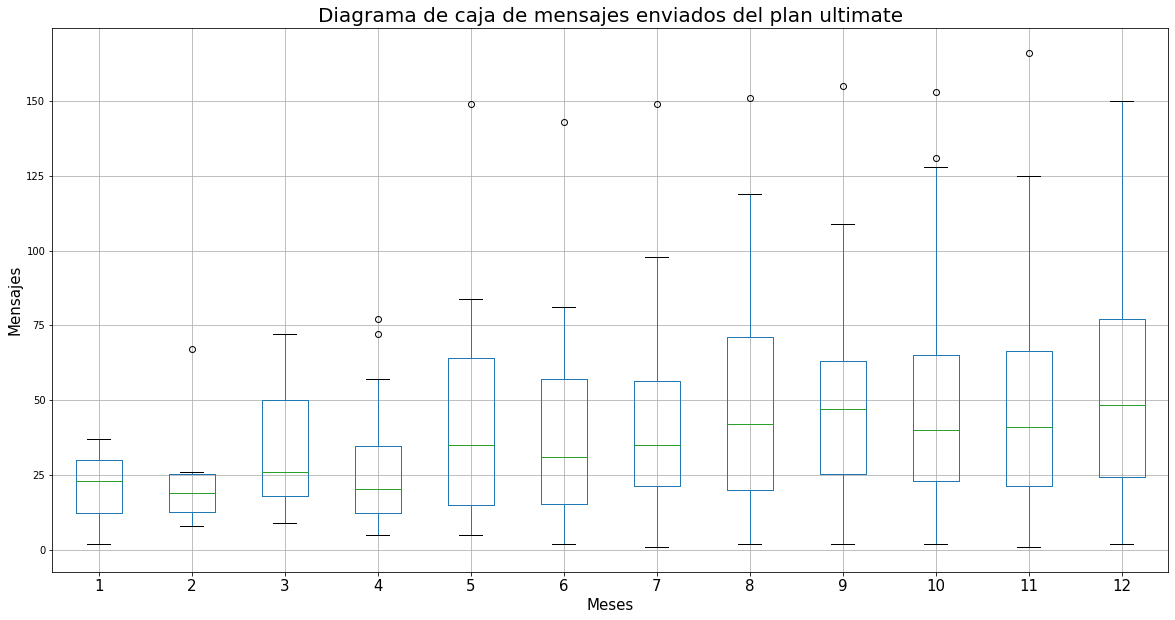

In [77]:
ultimate_msg.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja de mensajes enviados del plan ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Mensajes', fontsize=15)
plt.show()

Se aprecian valores atípicos en los mensajes enviados del plan ultimate en los meses 2, 4, 5, 6, 7, 8, 9, 10 y 11.
De igual manera, aprecia que todos los valores están dentro del rango de menos de 1,000 mensajes al mes, que es lo que ofrece el plan.

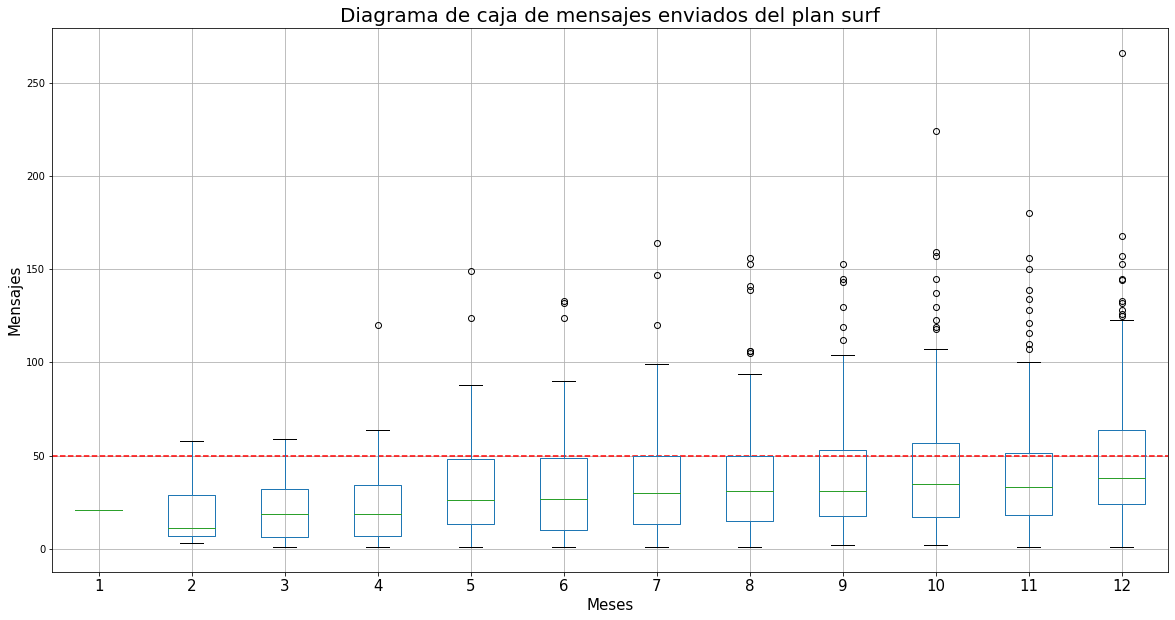

In [78]:
surf_msg.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja de mensajes enviados del plan surf", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Mensajes', fontsize=15)
reference = [50]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Se aprecian valores atípicos en los mensajes enviados del plan surf en los meses  4, 5, 6, 7, 8, 9, 10, 11 y 12.
De igual manera, aprecia que los valores sobrepasan el rango de 50 mensajes al mes, que es lo que ofrece el plan. Se puede apreciar que hay varios valores dentro de la caja y su bigote superior; que estan por encima del límite de mensajes que ofrece el plan.

Parece ser que los usuarios del plan ultimate envían al mes unos cuantos más mensajes, que los usuarios del plan surface.

### Internet

In [79]:
surf_int = merge_data.query('plan_name == "surf"')[["1_int", "2_int", "3_int", 
                                                          "4_int", "5_int", "6_int", 
                                                           "7_int", "8_int", "9_int", 
                                                           "10_int", "11_int", "12_int"]]
ultimate_int = merge_data.query('plan_name == "ultimate"')[["1_int", "2_int", "3_int", 
                                                          "4_int", "5_int", "6_int", 
                                                           "7_int", "8_int", "9_int", 
                                                           "10_int", "11_int", "12_int"]]

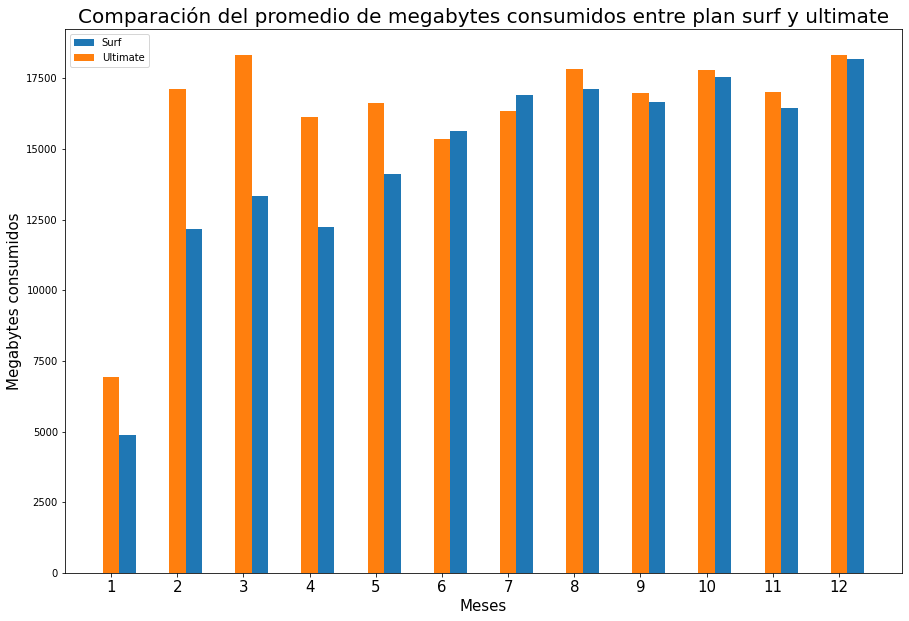

In [80]:
n = len(surf_int.mean().index)
x = np.arange(n) 
width = 0.25
plt.figure(figsize=(15, 10))
plt.bar(x+width, surf_int.mean(), width=0.25, label="Surf")
plt.bar(x, ultimate_int.mean(), width=0.25, label="Ultimate")
plt.title("Comparación del promedio de megabytes consumidos entre plan surf y ultimate", fontsize=20)
plt.legend(loc='best')
plt.xticks(x, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Megabytes consumidos', fontsize=15)
plt.show()

El promedio de los del consumo de megabytes en el plan ultimate es mayor en los primeros 5 meses. Despues no hay mucha diferencia entre el consumo en los planes.

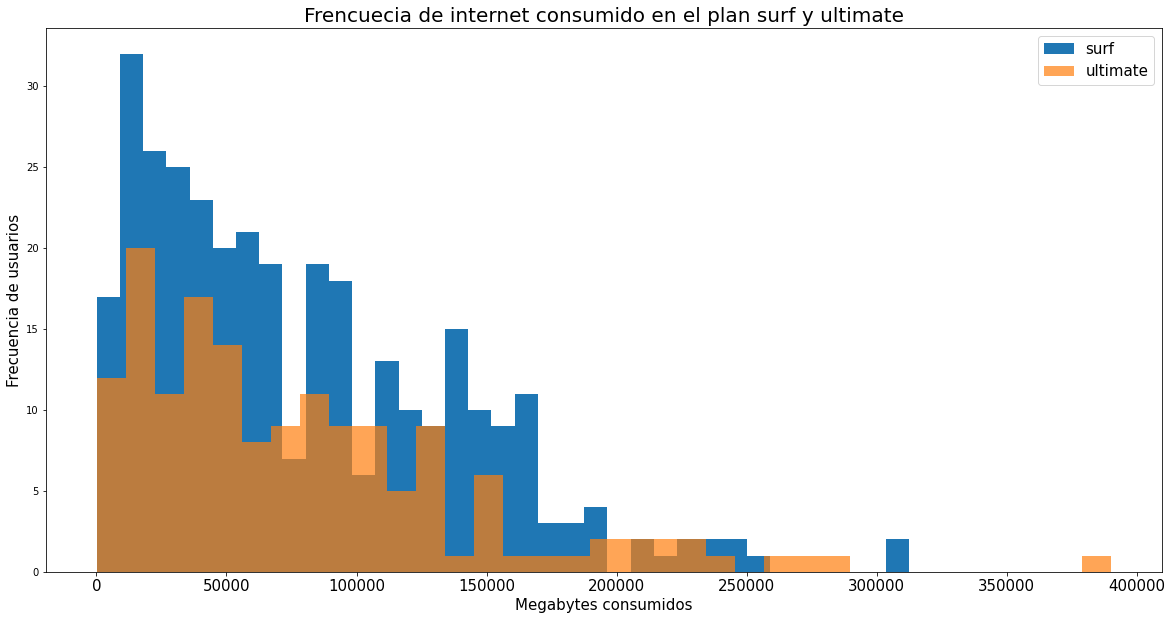

In [81]:
data_int.groupby("user_id").sum().merge(data, on="user_id", how="outer").query('plan == "surf"')["mb_used"].plot(kind="hist", bins=35, figsize=(20,10), label="surf")
data_int.groupby("user_id").sum().merge(data, on="user_id", how="outer").query('plan == "ultimate"')["mb_used"].plot(kind="hist", bins=35, figsize=(20,10), label="ultimate", alpha=0.7)
plt.title("Frencuecia de internet consumido en el plan surf y ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Megabytes consumidos', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.show()

Parece que los usuarios del plan surf tienen mas cosumo de intenet que los del plan ultimate.

In [82]:
ultimate_int.describe()

,1_int,2_int,3_int,4_int,5_int,6_int,7_int,8_int,9_int,10_int,11_int,12_int
count,4.000000,7.000000,12.000000,21.000000,29.000000,47.000000,59.000000,71.000000,86.000000,105.000000,127.000000,151.000000
mean,6918.092500,17128.808571,18321.518333,16121.654762,16624.482414,15337.921064,16344.744407,17814.720141,16969.869535,17780.292000,17033.685354,18323.191854
std,4049.038391,6135.885948,11846.483246,9403.648604,7535.921701,8486.137619,8271.590578,7774.772263,7024.175271,7384.591368,7588.773139,7866.466882
min,1315.350000,4975.190000,1586.390000,2947.770000,2292.120000,1449.370000,522.180000,630.230000,3818.350000,3465.510000,290.060000,233.170000
25%,5438.415000,16259.230000,7938.807500,8196.030000,13675.950000,10392.725000,11823.115000,14120.090000,12743.742500,12730.130000,12855.890000,13781.475000
50%,7860.690000,20085.200000,20812.505000,15651.160000,16499.790000,15342.760000,15068.780000,17954.650000,16434.410000,16992.860000,17130.900000,17346.080000
75%,9340.367500,20361.930000,28632.867500,20601.580000,20773.120000,20239.940000,20992.780000,20947.790000,19946.052500,21104.020000,20700.860000,22219.810000
max,10635.640000,21598.950000,36061.040000,37761.590000,32907.830000,37907.140000,38826.700000,40388.210000,37587.030000,46595.330000,42952.590000,46215.510000


In [83]:
surf_int.describe()

,1_int,2_int,3_int,4_int,5_int,6_int,7_int,8_int,9_int,10_int,11_int,12_int
count,2.000000,9.000000,23.000000,49.000000,76.000000,95.000000,120.000000,159.000000,193.000000,234.000000,281.000000,317.000000
mean,4874.860000,12178.843333,13345.440000,12228.778571,14119.728026,15623.666632,16923.463917,17112.224403,16677.397254,17533.275256,16455.548043,18189.669590
std,4270.825963,6608.551952,8261.086946,7564.514094,7724.799075,6715.077831,7927.374698,8402.176549,7081.155848,7708.760082,7460.787843,8445.826008
min,1854.930000,599.780000,1248.030000,92.310000,129.840000,1021.330000,113.740000,618.950000,409.430000,633.040000,240.000000,92.680000
25%,3364.895000,7045.440000,6152.990000,6759.660000,7462.882500,12559.775000,13013.457500,12051.285000,12566.120000,12603.520000,12247.500000,13833.400000
50%,4874.860000,11828.250000,13867.940000,11963.560000,13986.490000,15487.230000,16964.020000,17008.200000,16978.890000,17517.820000,16862.030000,17784.340000
75%,6384.825000,16319.150000,18749.965000,18087.220000,20333.112500,18583.280000,21525.145000,21308.450000,20991.890000,21286.520000,20535.200000,21917.350000
max,7894.790000,20389.870000,30347.760000,28509.800000,36672.290000,37102.770000,38929.090000,51809.350000,37298.020000,46868.750000,42866.100000,70931.590000


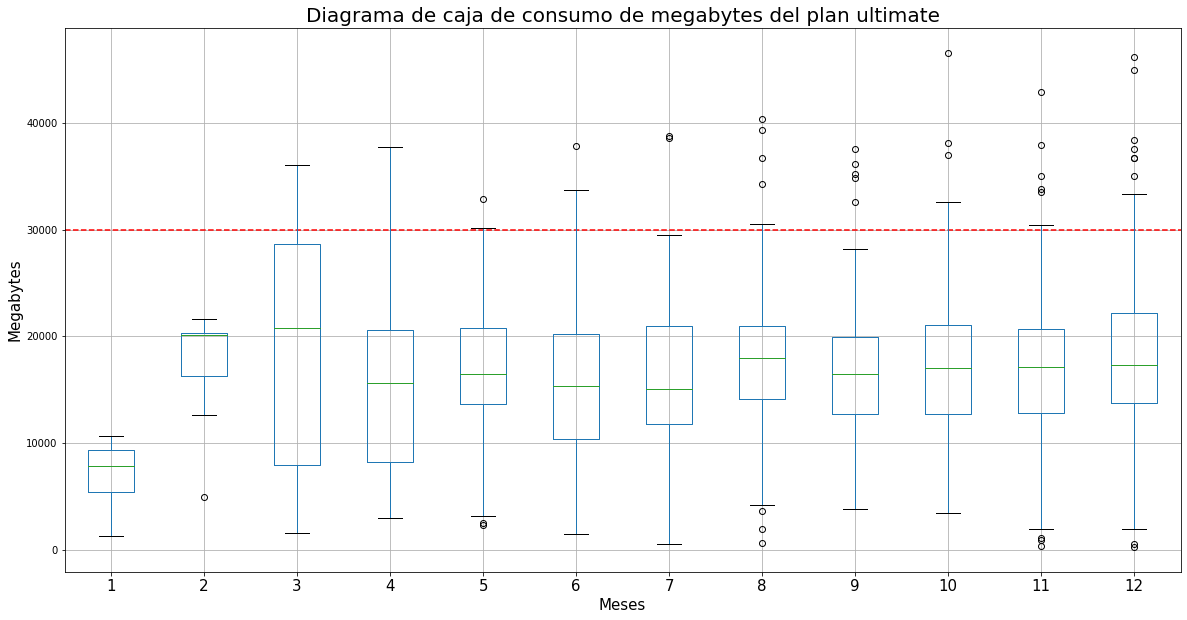

In [84]:
ultimate_int.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja de consumo de megabytes del plan ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Megabytes', fontsize=15)
reference = [30000]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

En el diagrama de cajas por mes del consumo de megabyte del plan ultimate, se obervan algunos valores atípicos en los meses 2, 5, 6, 7, 8, 9, 10, 11, 12.
DE igual manera, se puede apreciar que muchos valores estan dentro del rango por debajo de los 30Gigabyte que ofrece el plan.

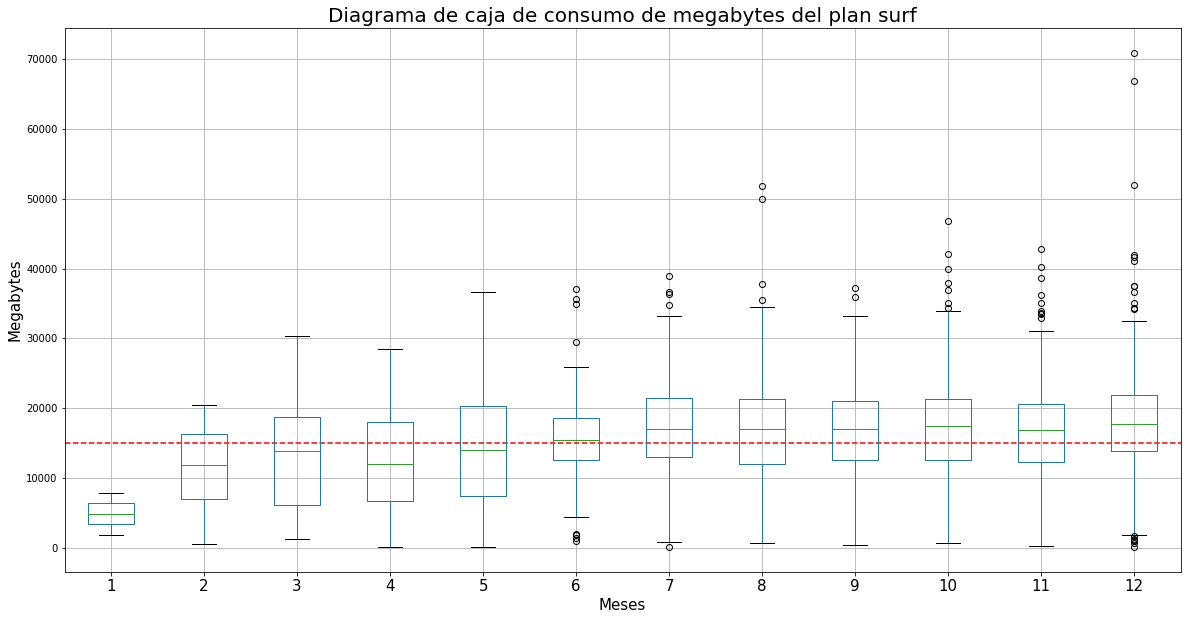

In [85]:
surf_int.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja de consumo de megabytes del plan surf", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Megabytes', fontsize=15)
reference = [15000]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

En el diagrama de cajas por mes del consumo de megabyte del plan ultimate, se obervan algunos valores atípicos en los meses  6, 7, 8, 9, 10, 11, 12.
De igual manera, se aprecia que hay varios valores por encima del rango de los 15 Gigabytes, varias medianas y promedios soprepasan el limite del plan.

El consumo de megabytes entre los usuarios de los planes ultimate y surface, varía muy poco. La mediana esta entre los 18,000 megabytes.

## Ingreso

In [86]:
ultimate_income = merge_data.query('plan_name == "ultimate"')[[
            "income_1", "income_2", "income_3", "income_4",
           "income_5", "income_6", "income_7", "income_8",
           "income_9", "income_10", "income_11", "income_12"]]
surf_income = merge_data.query('plan_name == "surf"')[[
            "income_1", "income_2", "income_3", "income_4",
           "income_5", "income_6", "income_7", "income_8",
           "income_9", "income_10", "income_11", "income_12"]]

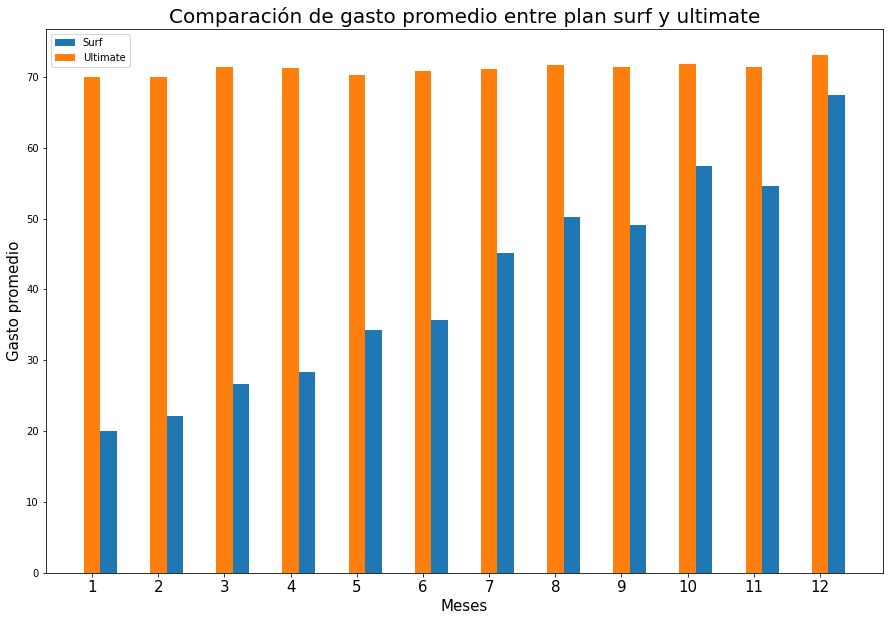

In [87]:
n = len(surf_income.mean().index)
x = np.arange(n) 
width = 0.25
plt.figure(figsize=(15, 10))
plt.bar(x+width, surf_income.mean(), width=0.25, label="Surf")
plt.bar(x, ultimate_income.mean(), width=0.25, label="Ultimate")
plt.title("Comparación de gasto promedio entre plan surf y ultimate", fontsize=20)
plt.legend(loc='best')
plt.xticks(x, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Gasto promedio', fontsize=15)
plt.show()

En los primeros 6 meses es mucho mayor el gasto promedio de los usuarios del plan ultimate, que los usuarios del plan surf

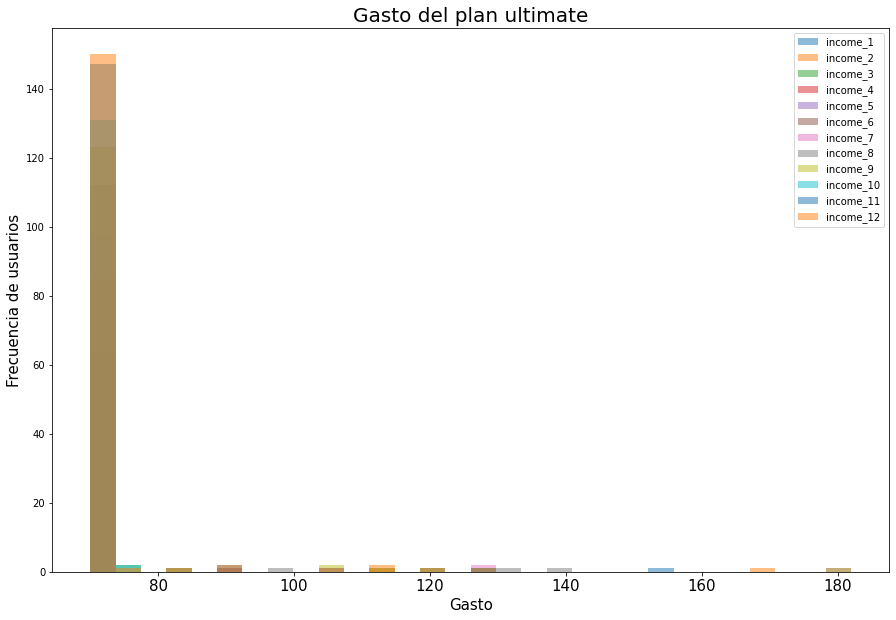

In [88]:
ultimate_income.plot(kind="hist", bins=30, figsize=(15,10), alpha=0.5)
plt.title("Gasto del plan ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Gasto', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.show()

Se puede apreciar que los datos del plan ultimate se acumular entre 40.

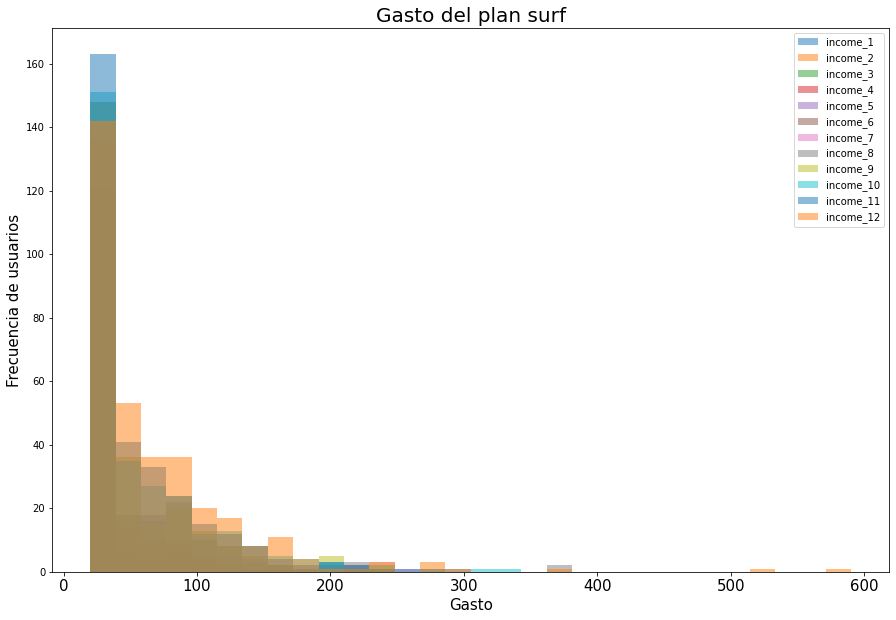

In [89]:
surf_income.plot(kind="hist", bins=30, figsize=(15,10), alpha=0.5)
plt.title("Gasto del plan surf", fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Gasto', fontsize=15)
plt.ylabel('Frecuencia de usuarios', fontsize=15)
plt.show()

Se puede apreciar que los datos del plan surf se acumular entre 30.

In [90]:
ultimate_income.describe()

,income_1,income_2,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12
count,19.0,31.0,41.000000,52.000000,65.000000,87.000000,99.000000,116.000000,128.000000,137.000000,152.000000,161.000000
mean,70.0,70.0,71.365854,71.211538,70.323077,70.885057,71.131313,71.750000,71.367188,71.788321,71.427632,73.086957
std,0.0,0.0,6.681153,7.030289,2.604729,6.387534,7.918780,9.807606,7.193469,11.484280,8.910595,14.148936
min,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
25%,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
50%,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
75%,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
max,70.0,70.0,112.000000,119.000000,91.000000,126.000000,126.000000,140.000000,119.000000,182.000000,154.000000,182.000000


In [91]:
surf_income.describe()

,income_1,income_2,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12
count,30.0,60.000000,90.000000,124.000000,149.000000,181.000000,205.000000,235.000000,255.000000,288.000000,311.000000,339.000000
mean,20.0,22.159500,26.629444,28.351048,34.277651,35.689503,45.188098,50.284468,49.116353,57.377882,54.582669,67.425192
std,0.0,9.216583,22.432655,24.118213,34.673629,35.708659,46.626192,53.697006,44.557244,54.144292,48.863189,66.837909
min,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.915000
50%,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,23.420000,30.945000,30.000000,49.260000
75%,20.0,20.000000,20.000000,20.000000,21.800000,36.990000,52.610000,70.150000,60.000000,80.000000,72.430000,90.000000
max,20.0,70.000000,170.000000,150.000000,231.950000,240.000000,260.630000,380.000000,240.780000,330.000000,290.360000,590.370000


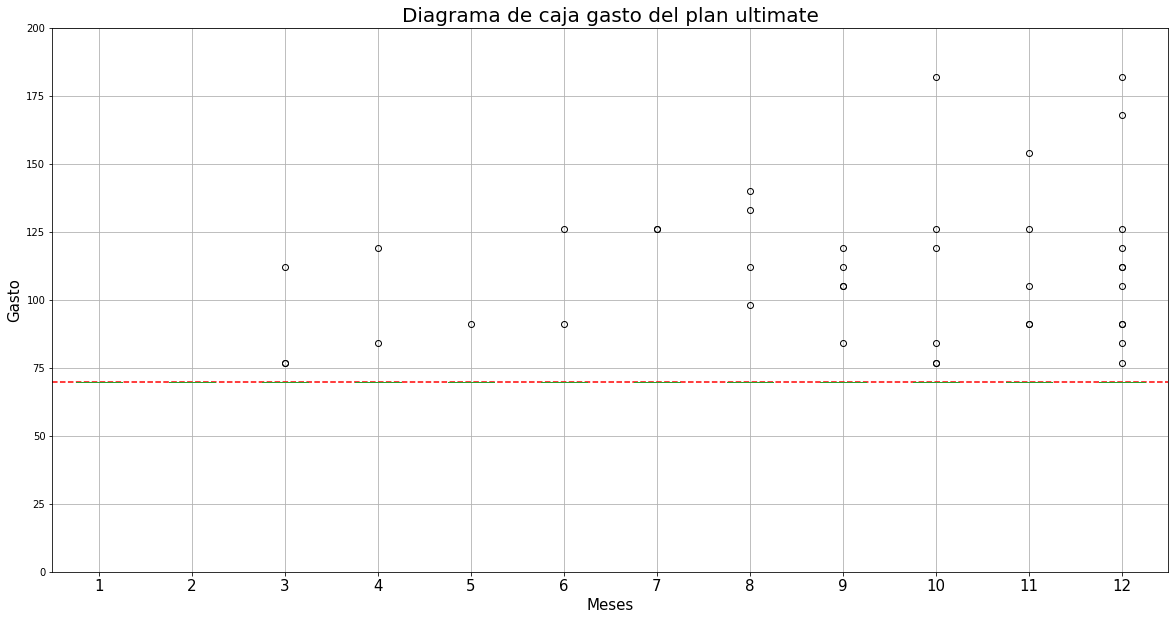

In [92]:
ultimate_income.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja gasto del plan ultimate", fontsize=20)
plt.xticks(fontsize=15)
plt.ylim(0, 200)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Gasto', fontsize=15)
reference = [70]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Parece que no hay suficientes datos para dibujar la caja, de igual manera la desviación estandar es muy pequeña.
El promedio y la mediana de los usuarios del plan ultimate de gasto es 70.

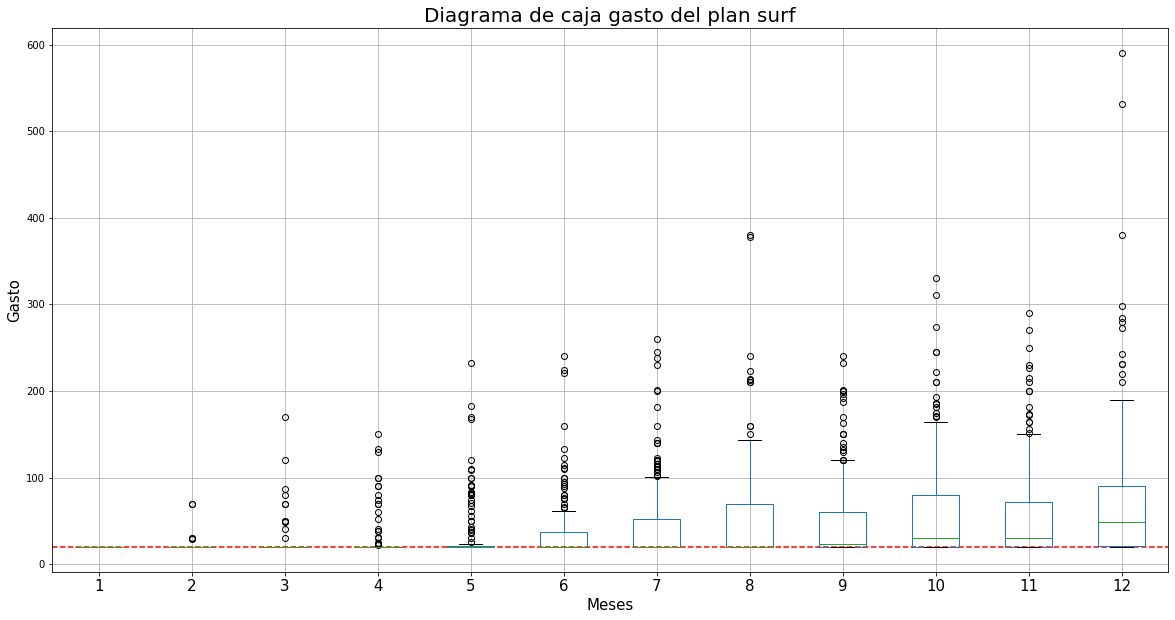

In [93]:
surf_income.boxplot(figsize=(20, 10))
plt.title("Diagrama de caja gasto del plan surf", fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(x+1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize=15)
plt.xlabel('Meses', fontsize=15)
plt.ylabel('Gasto', fontsize=15)
reference = [20]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Parece que hay varios usuarios en el plan surf que consumen mucho más de lo que su plan les proporciona.
Parece ser que el promedio y mediana de los usuarios del plan surf pagan mucho de los 20 dolares que vale su plan sin consumo extra.

Los usuarios del plan ultimate rara vez gastan más de lo que les ofrece su plan por 70 dolares. En cambio, los usuarios del plan surf parece que a muchos no les alcanza lo que incluye el plan y terminan gastando mucho más que en el plan ultimate.

## Probar las hipótesis estadísticas.

Antes de realizar nuestras pruebas haremos una prueba de Levene, en la cual observaremos si nuestras varianzas son homogeneas.

En ambos analisis se utilizaran los ingresos totales para contemplar todos los datos.

In [94]:
ultimate_income = ultimate_income.fillna(0)
ultimate_income["total"]= (ultimate_income["income_1"] + ultimate_income["income_2"] + ultimate_income["income_3"]
                        + ultimate_income["income_4"] + ultimate_income["income_5"] + ultimate_income["income_6"]
                        + ultimate_income["income_7"] + ultimate_income["income_8"] + ultimate_income["income_9"]
                        + ultimate_income["income_10"] + ultimate_income["income_11"] + ultimate_income["income_12"])

In [95]:
surf_income = surf_income.fillna(0)
surf_income["total"]= (surf_income["income_1"] + surf_income["income_2"] + surf_income["income_3"]
                        + surf_income["income_4"] + surf_income["income_5"] + surf_income["income_6"]
                        + surf_income["income_7"] + surf_income["income_8"] + surf_income["income_9"]
                        + surf_income["income_10"] + surf_income["income_11"] + surf_income["income_12"])

In [103]:
#Comprobar varianzas homgeneas
alpha = 0.05 # nivel crítico de significación estadística

results = levene(surf_income["total"], ultimate_income["total"]) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Las varianzas no son homogeneas")
else:
    print("Las varianzas son homogeneas")

p-value: 0.5135832496162157
Las varianzas son homogeneas


Las varianzas parece que son homogeneas, por lo tanto ajustaremos a la prueba el parametro equal_var a True.

La hipotesis nula sera la siguiente: **el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf no es diferente.**

Por lo tanto, la hipotesis alterna sería: **el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf es diferente**

In [97]:
# Prueba las hipótesis
alpha = 0.05 # nivel crítico de significación estadística
#En la muestra se utilizan los promedios de ingresos de cada mes por cada plan
results = st.ttest_ind(ultimate_income["total"], surf_income["total"], equal_var= True) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 2.9481556012796816e-09
Rechazamos la hipótesis nula


El analisis parece indicar que difieren los promedios de ingreso de los planes Surf y Ultimate

In [98]:
#Se prepara las muestras para mostrar la hipotesis
ny_income = merge_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')[[
            "income_1", "income_2", "income_3", "income_4",
           "income_5", "income_6", "income_7", "income_8",
           "income_9", "income_10", "income_11", "income_12","city"]]

no_ny_income = merge_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')[[
            "income_1", "income_2", "income_3", "income_4",
           "income_5", "income_6", "income_7", "income_8",
           "income_9", "income_10", "income_11", "income_12", "city"]]

In [99]:
ny_income = ny_income.fillna(0)
ny_income ["total"] = (ny_income["income_1"] + ny_income["income_2"] + ny_income["income_3"]
                        + ny_income["income_4"] + ny_income["income_5"] + ny_income["income_6"]
                        + ny_income["income_7"] + ny_income["income_8"] + ny_income["income_9"]
                        + ny_income["income_10"] + ny_income["income_11"] + ny_income["income_12"]) 

In [100]:
no_ny_income = no_ny_income.fillna(0)
no_ny_income ["total"] = (no_ny_income["income_1"] + no_ny_income["income_2"] + no_ny_income["income_3"]
                        + no_ny_income["income_4"] + no_ny_income["income_5"] + no_ny_income["income_6"]
                        + no_ny_income["income_7"] + no_ny_income["income_8"] + no_ny_income["income_9"]
                        + no_ny_income["income_10"] + no_ny_income["income_11"] + no_ny_income["income_12"]) 

In [101]:
#Comprobar varianzas homgeneas
alpha = 0.05 # nivel crítico de significación estadística

results = levene(ny_income["total"], no_ny_income["total"]) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Las varianzas no son homogeneas")
else:
    print("Las varianzas son homogeneas")

p-value: 0.38793269731583635
Las varianzas son homogeneas


Las varianzas parece que son homogeneas, por lo tanto ajustaremos a la prueba el parametro equal_var a True.

La hipotesis nula sera la siguiente: **el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones.**

Por lo tanto, la hipotesis alterna sería: **el ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.**

In [102]:
# Prueba las hipótesis
alpha = 0.05 # nivel crítico de significación estadística
#En la muestra se utilizan los promedios de ingresos de cada mes por cada pla
results = st.ttest_ind(ny_income["total"], no_ny_income["total"], equal_var= True) # prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales
print('p-value:', results.pvalue)

if alpha > results.pvalue :
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.6531057418922338
No rechazamos la hipótesis nula


La prueba nos muestra que al parecer los ingresos promedio de las áreas de NY-NJ es igual al ingreso promedio de las demás áreas.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones importantes (suposiciones) que tomaste y que te llevaron a procesar y analizar los datos del modo en que lo hiciste.]

Antes de realizar cualquier conclusión es importante aclarar, que las observaciones estan hechas para los ultimos 4 meses del año, debido no había muchos usuarios registrados hasta finales del 2018.

Despues de analizar los gráficos realizados para las llamadas, mensajes, internet e ingresos; se pueden realizar las siguientes afirmaciones:
1- El promedio y mediana de la duración de llamadas en ambos planes, es muy similar. Con la diferencia que en el plan Ultimate incluye 3000 minutos y el plan Surf ofrece 500 minutos. En los gráficos se puede apreciar, que el promedio mensual de consumo de minutos en el plan Surf sobrepasa el limite en el diagrama de caja y sus bigotes. Por consiguiente, en general pagan consumo extra los usuarios del plan Surf.

2- El promedio y mediana de los mensajes enviados en ambos planes, es muy similar. Con la diferencia que en el plan Ultimate incluye 1,000 mensajes y el plan Surf ofrece 50 mensajes. En los gráficos se puede apreciar, que el promedio mensual de consumo de mensajes enviados en el plan Surf sobrepasa el limite en el diagrama de caja y sus bigotes. Por consiguiente, en general pagan consumo extra los usuarios del plan Surf.

3- El promedio y mediana de los consumo de internet en ambos planes, es muy similar. Con la diferencia que en el plan Ultimate incluye 30 Gb de internet y el plan Surf ofrece 15 Gb de internet. En los gráficos se puede apreciar, que el promedio mensual de consumo de internet en el plan Surf sobrepasa el limite en el diagrama de caja y sus bigotes. Por consiguiente, en general pagan consumo extra los usuarios del plan Surf.

4- Los usuarios del plan ultimate y surf pagan en promedio lo mismo, con la diferencia que en el plan surf pagan sobreprecio de más de 100 dlls, a pesar que es el plan más económico.

5-. El t-test cofirma que los usuarios de ambos planes pagan valores distintos casi siempre.

6-. El t-test confirma que los usuarios en todas las regiones pagan valores similares.

En resumen, es recomendable que se incentiven campañas de publicidad para el plan surf, que apesar de ser el más económico lo usuarios terminan consumiendo minutos de llamada, mensajes e internet extra, lo cual genera sobrecargos que superan los 70 dlls del plan ulimate.